In [3]:
import wk6
import torch
import numpy as np

In [4]:
SEQ_LENGTH = 50
SAMPLES = 1000
MAX_ITERATIONS = 1000

In [5]:
X, y = wk6.generate_sine_data(SEQ_LENGTH, SAMPLES)

X = X[..., np.newaxis]
y = y[..., np.newaxis]


In [6]:
train_loader = torch.utils.data.DataLoader(list(zip(X,y)), batch_size=32, shuffle=True)

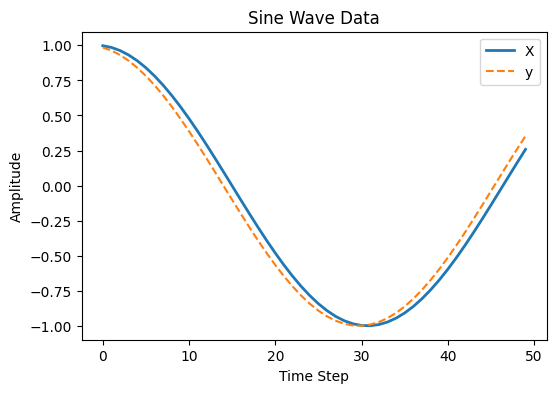

In [7]:
# plot the data using wk6.plots
batch_X, batch_y = next(iter(train_loader))

wk6.plots(batch_X, batch_y, 0, "Sine Wave Data")

In [8]:
import torch.nn as nn
import torch.optim as optim

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
RNN = wk6.RNNModel(input_size=1, hidden_size=32, num_layers=2).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(RNN.parameters(), lr=0.001)

In [11]:
for iteration in range(MAX_ITERATIONS):
    for batch_X, batch_y in iter(train_loader):
        batch_X = batch_X.to(device).float()
        batch_y = batch_y.to(device).float()

        optimizer.zero_grad()
        outputs = RNN(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (iteration+1) % 100 == 0:
        print(f"Iteration [{iteration+1}/{MAX_ITERATIONS}], Loss: {loss.item():.4f}")

Iteration [100/1000], Loss: 0.0003
Iteration [200/1000], Loss: 0.0002
Iteration [300/1000], Loss: 0.0001
Iteration [400/1000], Loss: 0.0001
Iteration [500/1000], Loss: 0.0001
Iteration [600/1000], Loss: 0.0001
Iteration [700/1000], Loss: 0.0001
Iteration [800/1000], Loss: 0.0001
Iteration [900/1000], Loss: 0.0001
Iteration [1000/1000], Loss: 0.0001


In [20]:
lSTM = wk6.LSTMModel(input_size=1, hidden_size=32, num_layers=2).to(device)
GRU = wk6.GRUModel(input_size=1, hidden_size=32, num_layers=2).to(device)

In [21]:
# Train LSTM and GRU using same optimiser and criterion as before
for iteration in range(MAX_ITERATIONS):
    for batch_X, batch_y in iter(train_loader):
        batch_X = batch_X.to(device).float()
        batch_y = batch_y.to(device).float()

        # Train LSTM
        optimizer.zero_grad()
        outputs = lSTM(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        # Train GRU
        optimizer.zero_grad()
        outputs = GRU(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (iteration+1) % 100 == 0:
        print(f"Iteration [{iteration+1}/{MAX_ITERATIONS}], Loss: {loss.item():.4f}")

KeyboardInterrupt: 

In [18]:
#compare the three models on a test sequence
test_seq_length = 100
test_X, test_y = wk6.generate_sine_data(test_seq_length, 1)
test_X = test_X[..., np.newaxis]
test_y = test_y[..., np.newaxis]
test_X_tensor = torch.tensor(test_X, dtype=torch.float32).to(device)
RNN.eval()
lSTM.eval()
GRU.eval()
with torch.no_grad():
    rnn_pred = RNN(test_X_tensor).cpu().numpy()
    lstm_pred = lSTM(test_X_tensor).cpu().numpy()
    gru_pred = GRU(test_X_tensor).cpu().numpy()

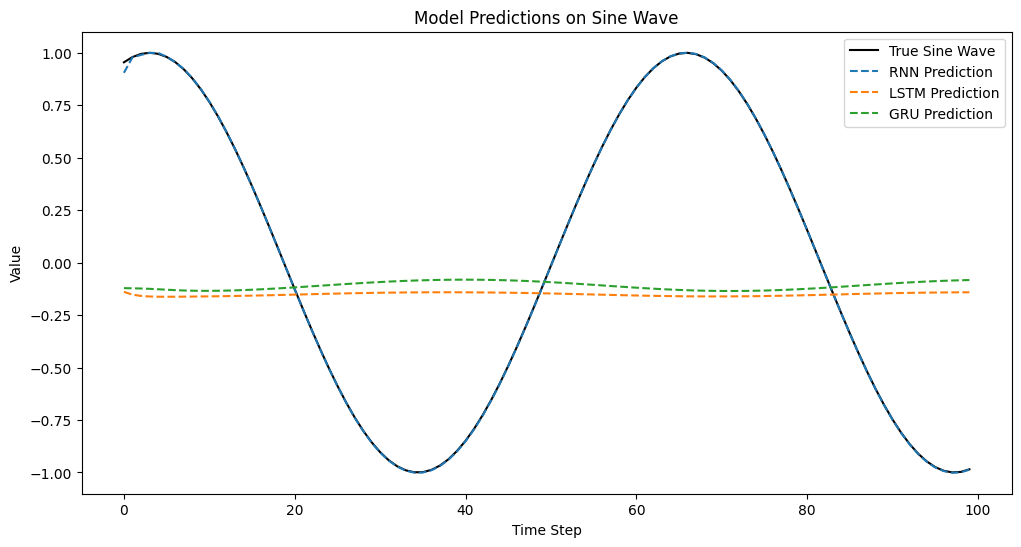

In [22]:
# Plot the predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test_y.flatten(), label='True Sine Wave', color='black')
plt.plot(rnn_pred.flatten(), label='RNN Prediction', linestyle='--')
plt.plot(lstm_pred.flatten(), label='LSTM Prediction', linestyle='--')
plt.plot(gru_pred.flatten(), label='GRU Prediction', linestyle='--')
plt.legend()
plt.title('Model Predictions on Sine Wave')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()